# Language detector

## Differencies between italian and english language

In every language there is a different frequency for the occurance of a specific letter. For example in italian the most common letter is 'i' but in english it is 'e'. Thanks to this specific digital impront for every language we can create a simple alghoritm that can help us to find the language in input. This algorithm works only with long string because it is very difficult to analyse the small ones.

After the creation of an array of 26 number it searchs the occurancy of every letter in the text and than it divedes it by the total of the letters so we have an array with the occurancy of a letter every 100. There is a more compact way to create this algorithm but i preferred this because it is easier to understand than the others.

In [26]:
def calcola_pesi_lettere(text):
    pesi_lettere = []
    cont=0
    for i in range(26):
        pesi_lettere.append(0)

    for i in text:
        i=i.upper()
        for x in range(26):
            if((ord(i)-ord('A'))>=0 and (ord(i)-ord('A'))<26):
                pesi_lettere[ord(i)-ord('A')]+=1
                cont+=1
    for x in range(26):
        pesi_lettere[x]=pesi_lettere[x]/cont
    return pesi_lettere

To create the array for the two different language we need a text source big enough to be rapresentitive of the whole language.

In [27]:
from bs4 import BeautifulSoup
import requests
import numpy as np
website_ita = requests.get('https://it.wikipedia.org/wiki/Lingua_italiana')
soup_ita = BeautifulSoup(website_ita.content, 'html.parser')
pesi_lettere_ita = calcola_pesi_lettere(soup_ita.text)

website_eng = requests.get('https://en.wikipedia.org/wiki/World_War_II')
soup_eng = BeautifulSoup(website_eng.content, 'html.parser')
pesi_lettere_eng = calcola_pesi_lettere(soup_eng.text)

In [28]:
import matplotlib.pyplot as plt
letters=[]
for i in range(26):
    letters.append(chr(i+ord('A')))

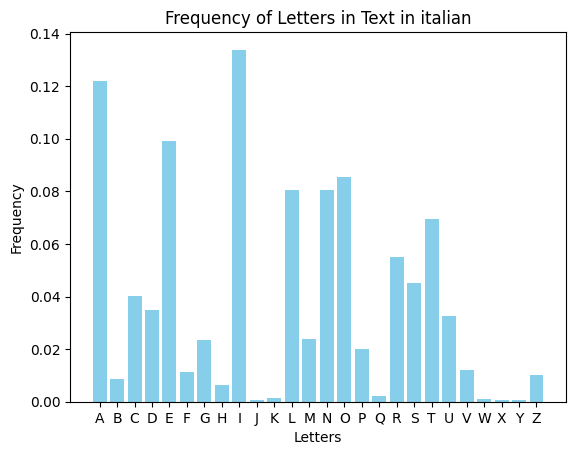

<Figure size 1500x800 with 0 Axes>

In [29]:
plt.bar(letters, pesi_lettere_ita, color='skyblue')
plt.title('Frequency of Letters in Text in italian')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.figure(figsize=(15, 8))
plt.show()

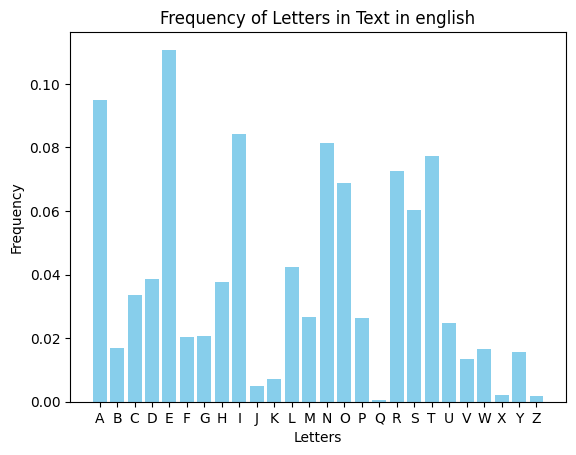

<Figure size 1500x800 with 0 Axes>

In [30]:
plt.bar(letters, pesi_lettere_eng, color='skyblue')
plt.title('Frequency of Letters in Text in english')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.figure(figsize=(15, 8))
plt.show()

This two histograms help us to see how are distributed the letters in the two languages.

Here there is the function that confront the text with both the array of the frequencies and the one with the smallest sum indicate the language of the text.

In [48]:
def find_language(pesi_lettere_ita, pesi_lettere_eng, text):
    pesi_lettere_text= calcola_pesi_lettere(text)
    sum_ita=0
    sum_eng=0
    for i in range(26):
        sum_ita += abs(pesi_lettere_ita[i] - pesi_lettere_text[i])
        sum_eng += abs(pesi_lettere_eng[i] - pesi_lettere_text[i])
    if(sum_ita<sum_eng):
        print("italian")
    else:
        print("english")
    return

In [49]:
text = []
text.append("Japan aimed to dominate East Asia and the Asia-Pacific, and by 1937 was at war with the Republic of China. In December 1941, Japan attacked American and British territories in Southeast Asia and the Central Pacific, including at Pearl Harbor in Hawaii, which resulted in the US and the UK declaring war against Japan; the European Axis declared war on the US. Japan conquered much of coastal China and Southeast Asia, but its advances in the Pacific were halted in mid-1942 after its defeat in the naval Battle of Midway")
text.append("Gli storici della lingua italiana etichettano le parlate che si svilupparono in questo modo in Italia durante il Medioevo come volgari italiani, al plurale, e non ancora come lingua italiana. Le testimonianze disponibili mostrano infatti marcate differenze tra le parlate delle diverse zone, mentre mancava un comune modello volgare di riferimento")
text.append("Does it work with short text? Or i need more than a phrase. I think i need at least 3 sentences")

for i in text:
    find_language(pesi_lettere_ita, pesi_lettere_eng, i)

english
italian
english


This notebook can be used to detect only the language that uses the latin alphabet or it is better to say that i tried it with only the language with the latin alphabet. To find the language for smaller string we need a differet idea that I am going to probably affront in the next notebook.